In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#reading CSV file
df=pd.read_csv("fundamentals.csv")

In [3]:
df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [4]:
df.shape

(1781, 79)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

#### Step1: Renaming Headers 


In this step, the unnamed column is replaced with a valid name. The column name is changed to a valid understandable format.

In [6]:
df.rename(columns={"Unnamed: 0": "Number", "Period Ending":"End Date","Add'l income/expense items": "Expense", "Cost of Revenue":"Sales Price", "Short-Term Debt / Current Portion of Long-Term Debt": "Current Debt"}, inplace=True)

In [7]:
df.head()

,Number,Ticker Symbol,End Date,Accounts Payable,Accounts Receivable,Expense,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


#### Step2: Replacing white spaces in column names with underscore


This step transforms all the columns with whitespace between the names replaced by an underscore. It makes the columns look more readable format.

In [8]:
df.columns = df.columns.str.replace(' ','_')

In [9]:
df.head()

,Number,Ticker_Symbol,End_Date,Accounts_Payable,Accounts_Receivable,Expense,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_Ratio,...,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities_&_Equity,Total_Revenue,Treasury_Stock,For_Year,Earnings_Per_Share,Estimated_Shares_Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


#### Step 3: check for missing values

This step checks for the missing values and gives the count of missing values for each column.

In [10]:
df.isna().sum()

Number                            0
Ticker_Symbol                     0
End_Date                          0
Accounts_Payable                  0
Accounts_Receivable               0
                               ... 
Total_Revenue                     0
Treasury_Stock                    0
For_Year                        173
Earnings_Per_Share              219
Estimated_Shares_Outstanding    219
Length: 79, dtype: int64

#### Step 4: Check for duplicates
This step checks for the duplicates and gives the count

In [11]:
df.duplicated().sum()

0

#### Step 5: Drop null value rows

This step drops all the rows which are having null values in it. This makes the analysis more accurate.

In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df.shape

(1299, 79)

#### Step 6: Drop unwanted columns

This step removes the mentioned columns from the dataset. 

In [14]:
df.drop(['Equity_Earnings/Loss_Unconsolidated_Subsidiary', 'Deferred_Asset_Charges', 'Effect_of_Exchange_Rate', 'Long-Term_Investments', 'Minority_Interest', 'Misc._Stocks','Other_Operating_Items','Research_and_Development'], inplace=True, axis=1)

In [15]:
df.shape

(1299, 71)

#### Calculating Outliers

Outliers are the extreme values within the dataset. That means the outlier data points vary greatly from the expected values either being much larger or significantly smaller. In this step, I am calculating the outliers.

In [16]:
df.describe()

,Number,Accounts_Payable,Accounts_Receivable,Expense,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_Ratio,Cash_and_Cash_Equivalents,Changes_in_Inventories,...,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities_&_Equity,Total_Revenue,Treasury_Stock,For_Year,Earnings_Per_Share,Estimated_Shares_Outstanding
count,1299.000000,1.299000e+03,1.299000e+03,1.299000e+03,1299.000000,1.299000e+03,1.299000e+03,1299.000000,1.299000e+03,1.299000e+03,...,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1.299000e+03,1299.000000,1299.000000,1.299000e+03
mean,900.877598,3.709840e+09,-7.364829e+07,8.845911e+07,47.234796,-1.471495e+09,4.248825e+09,73.934565,1.820352e+09,-8.116966e+07,...,8.085596e+09,5.637950e+09,9.537915e+09,1.712867e+10,2.666659e+10,2.134803e+10,-4.399277e+09,2013.219400,3.319923,5.807538e+08
std,507.943350,7.463106e+09,5.304388e+08,7.583589e+08,249.888806,3.380823e+09,8.643626e+09,100.580915,3.072288e+09,4.218345e+08,...,1.447895e+10,1.001800e+10,1.824904e+10,2.844549e+10,4.361829e+10,4.489432e+10,1.605909e+10,22.193998,5.016596,9.966520e+08
min,0.000000,7.199000e+07,-6.452000e+09,-4.577000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,...,1.447860e+08,1.642480e+08,-1.324400e+10,2.320000e+08,1.103602e+09,5.804150e+08,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,481.000000,6.342590e+08,-1.010000e+08,-3.427000e+06,11.000000,-1.399000e+09,3.534500e+08,16.000000,2.970000e+08,-7.323100e+07,...,1.814450e+09,1.085870e+09,2.076000e+09,3.311690e+09,6.165850e+09,4.123165e+09,-3.186500e+09,2013.000000,1.590000,1.437613e+08
50%,904.000000,1.388700e+09,-2.101900e+07,4.000000e+06,18.000000,-4.299870e+08,1.506000e+09,41.000000,8.270000e+08,-2.153000e+06,...,3.494000e+09,2.357200e+09,4.307075e+09,7.848200e+09,1.294400e+10,8.205088e+09,-3.381500e+08,2014.000000,2.790000,2.855204e+08
75%,1339.500000,3.261234e+09,1.710000e+07,3.780000e+07,28.000000,-1.563680e+08,5.044000e+09,89.000000,1.963500e+09,0.000000e+00,...,7.832350e+09,5.356500e+09,9.816950e+09,1.864400e+10,3.098300e+10,1.749658e+10,0.000000e+00,2015.000000,4.500000,5.570089e+08
max,1779.000000,6.067100e+10,4.692000e+09,1.416200e+10,5789.000000,0.000000e+00,9.110800e+10,1041.000000,5.352800e+10,2.658000e+09,...,1.396600e+11,8.233600e+10,1.743990e+11,2.800010e+11,4.026720e+11,4.856510e+11,0.000000e+00,2016.000000,50.090000,8.419048e+09


<AxesSubplot:xlabel='After_Tax_ROE'>

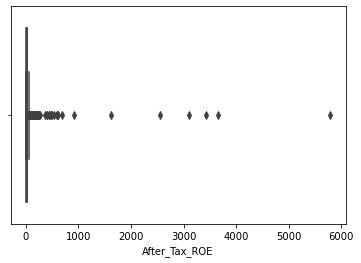

In [17]:
sns.boxplot(x=df['After_Tax_ROE'])

<AxesSubplot:xlabel='Cash_Ratio'>

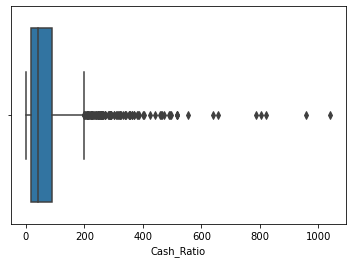

In [18]:
sns.boxplot(x=df['Cash_Ratio'])

#### Step 8: Removing Outliers

This step is used to remove the outliers using Z-score treatment and then use the describe function to view the differences between before and after the treatment.

In [19]:
df = df[np.abs(stats.zscore(df["After_Tax_ROE"])) <= 3]

<AxesSubplot:xlabel='After_Tax_ROE'>

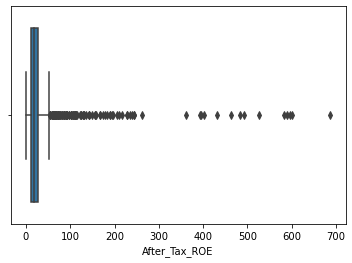

In [20]:
sns.boxplot(x=df['After_Tax_ROE'])

In [21]:
df = df[np.abs(stats.zscore(df["Cash_Ratio"])) <= 3]

<AxesSubplot:xlabel='Cash_Ratio'>

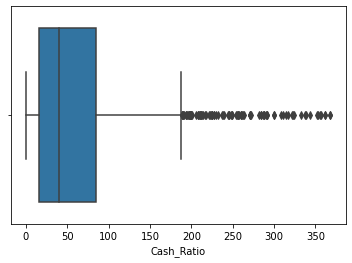

In [22]:
sns.boxplot(x=df['Cash_Ratio'])

In [23]:
df.describe()

,Number,Accounts_Payable,Accounts_Receivable,Expense,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_Ratio,Cash_and_Cash_Equivalents,Changes_in_Inventories,...,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities_&_Equity,Total_Revenue,Treasury_Stock,For_Year,Earnings_Per_Share,Estimated_Shares_Outstanding
count,1267.000000,1.267000e+03,1.267000e+03,1.267000e+03,1267.000000,1.267000e+03,1.267000e+03,1267.000000,1.267000e+03,1.267000e+03,...,1.267000e+03,1.267000e+03,1.267000e+03,1.267000e+03,1.267000e+03,1.267000e+03,1.267000e+03,1267.000000,1267.000000,1.267000e+03
mean,899.740331,3.783577e+09,-7.431116e+07,8.883388e+07,31.434886,-1.494945e+09,4.224499e+09,64.132597,1.828496e+09,-8.357409e+07,...,8.145966e+09,5.753623e+09,9.602475e+09,1.742581e+10,2.702829e+10,2.176180e+10,-4.490815e+09,2013.194949,3.378800,5.804060e+08
std,507.266066,7.540122e+09,5.356781e+08,7.665360e+08,59.642665,3.416224e+09,8.650737e+09,70.428735,3.096294e+09,4.266939e+08,...,1.461596e+10,1.011522e+10,1.839303e+10,2.870966e+10,4.403249e+10,4.537574e+10,1.624938e+10,22.471411,4.628358,1.002427e+09
min,0.000000,7.199000e+07,-6.452000e+09,-4.577000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,...,1.447860e+08,1.642480e+08,-1.324400e+10,2.320000e+08,1.103602e+09,7.630000e+08,-2.297340e+11,1215.000000,-35.550000,-1.513945e+09
25%,476.500000,6.504715e+08,-1.013000e+08,-3.747000e+06,11.000000,-1.441150e+09,3.314000e+08,16.000000,2.956015e+08,-7.595000e+07,...,1.808790e+09,1.114292e+09,2.086492e+09,3.476906e+09,6.272390e+09,4.226100e+09,-3.370900e+09,2013.000000,1.610000,1.429348e+08
50%,891.000000,1.427100e+09,-2.157700e+07,3.905000e+06,18.000000,-4.413830e+08,1.493965e+09,40.000000,8.270000e+08,-3.816000e+06,...,3.508400e+09,2.423010e+09,4.329000e+09,8.049000e+09,1.323300e+10,8.446000e+09,-3.386240e+08,2014.000000,2.850000,2.883333e+08
75%,1341.000000,3.352086e+09,1.733250e+07,3.800000e+07,28.000000,-1.607975e+08,5.044000e+09,85.000000,1.980500e+09,0.000000e+00,...,7.870000e+09,5.468500e+09,9.942000e+09,1.927600e+10,3.137500e+10,1.775355e+10,0.000000e+00,2015.000000,4.510000,5.518524e+08
max,1779.000000,6.067100e+10,4.692000e+09,1.416200e+10,687.000000,0.000000e+00,9.110800e+10,368.000000,5.352800e+10,2.658000e+09,...,1.396600e+11,8.233600e+10,1.743990e+11,2.800010e+11,4.026720e+11,4.856510e+11,0.000000e+00,2016.000000,50.090000,8.419048e+09
